# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #285238ff; text-align: center; line-height: 1.25;"><b>Electric Vehicles Market Size Analysis</b></h1>

### <span style="color:#285238ff;">Market Size Analysis for Electric Vehicles</span>

<span style="color:#138a36ff;">The process of analyzing the market size for electric vehicles involves several key steps, each of which is crucial for accurate and actionable insights. Below is the recommended process:</span>

<ul style="color:#138a36ff;">
  <li><strong>Define the Scope:</strong> Determine whether the analysis is global, regional, or focused on specific countries. This step sets the boundaries and ensures the analysis is relevant to the intended audience.</li>
  
  <li><strong>Data Collection:</strong> Gather information from reputable sources such as industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications. These sources provide reliable data on the EV market.</li>
  
  <li><strong>Identify Trends:</strong> Use historical data to identify trends in EV sales, production, and market evolution. Analyzing these trends helps in understanding the market dynamics and potential growth areas.</li>
  
  <li><strong>Market Analysis:</strong> Analyze the market size and growth rates for different EV segments, such as passenger vehicles, commercial vehicles, and two-wheelers. This step involves assessing the current market and forecasting future growth.</li>
  
  <li><strong>Strategic Recommendations:</strong> Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market. These recommendations should be tailored to the specific market conditions and opportunities identified in the analysis.</li>
</ul>


### <span style="color:#285238ff;">Import Essential Libraries</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

### <span style="color:#285238ff;">Import Dataset</span>

In [2]:
ev_data = pd.read_csv('dataset/Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

### <span style="color:#138a36ff;">So, this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward:</span>

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

### <span style="color:#138a36ff;">We can see there is some null values in dataset, lets count the null values :</span>

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

### <span style="color:#138a36ff;">Now, clean those null values using dropna() :</span>

In [5]:
ev_data = ev_data.dropna()

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

### <span style="color:#285238ff;">Exploring Areas for Electric Vehicle Market Size Analysis</span>

<span style="color:#138a36ff;">To thoroughly analyze the market size of electric vehicles, we can explore several key areas that provide insights into market dynamics and growth potential. The following areas are recommended for a comprehensive analysis:</span>

<ul style="color:#138a36ff;">
  <li><strong>EV Adoption Over Time:</strong> Analyze the growth of the EV population by model year. This analysis helps to understand how the adoption rate of electric vehicles has changed over time and identify any significant trends or patterns.</li>
  
  <li><strong>Geographical Distribution:</strong> Understand where EVs are most commonly registered, such as by county or city. This geographic analysis can reveal hotspots of EV adoption and inform regional market strategies.</li>
  
  <li><strong>EV Types:</strong> Breakdown of the dataset by electric vehicle type, such as Battery Electric Vehicles (BEV), Plug-in Hybrid Electric Vehicles (PHEV), etc. This differentiation helps in understanding the composition of the market and the popularity of different EV types.</li>
  
  <li><strong>Make and Model Popularity:</strong> Identify the most popular makes and models among the registered EVs. Analyzing make and model popularity provides insights into consumer preferences and can indicate leading manufacturers in the market.</li>
  
  <li><strong>Electric Range Analysis:</strong> Analyze the electric range of vehicles to see how EV technology is progressing. This analysis can indicate improvements in battery technology and the increasing viability of EVs for longer trips.</li>
  
  <li><strong>Estimated Growth in Market Size:</strong> Analyze and find the estimated growth in the market size of electric vehicles. This involves forecasting future market conditions and growth potential based on historical data and current trends.</li>
</ul>


### <span style="color:#138a36ff;">Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:</span>

C:\Users\Akashdeep Dam\AppData\Local\Temp\ipykernel_12416\3140576391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


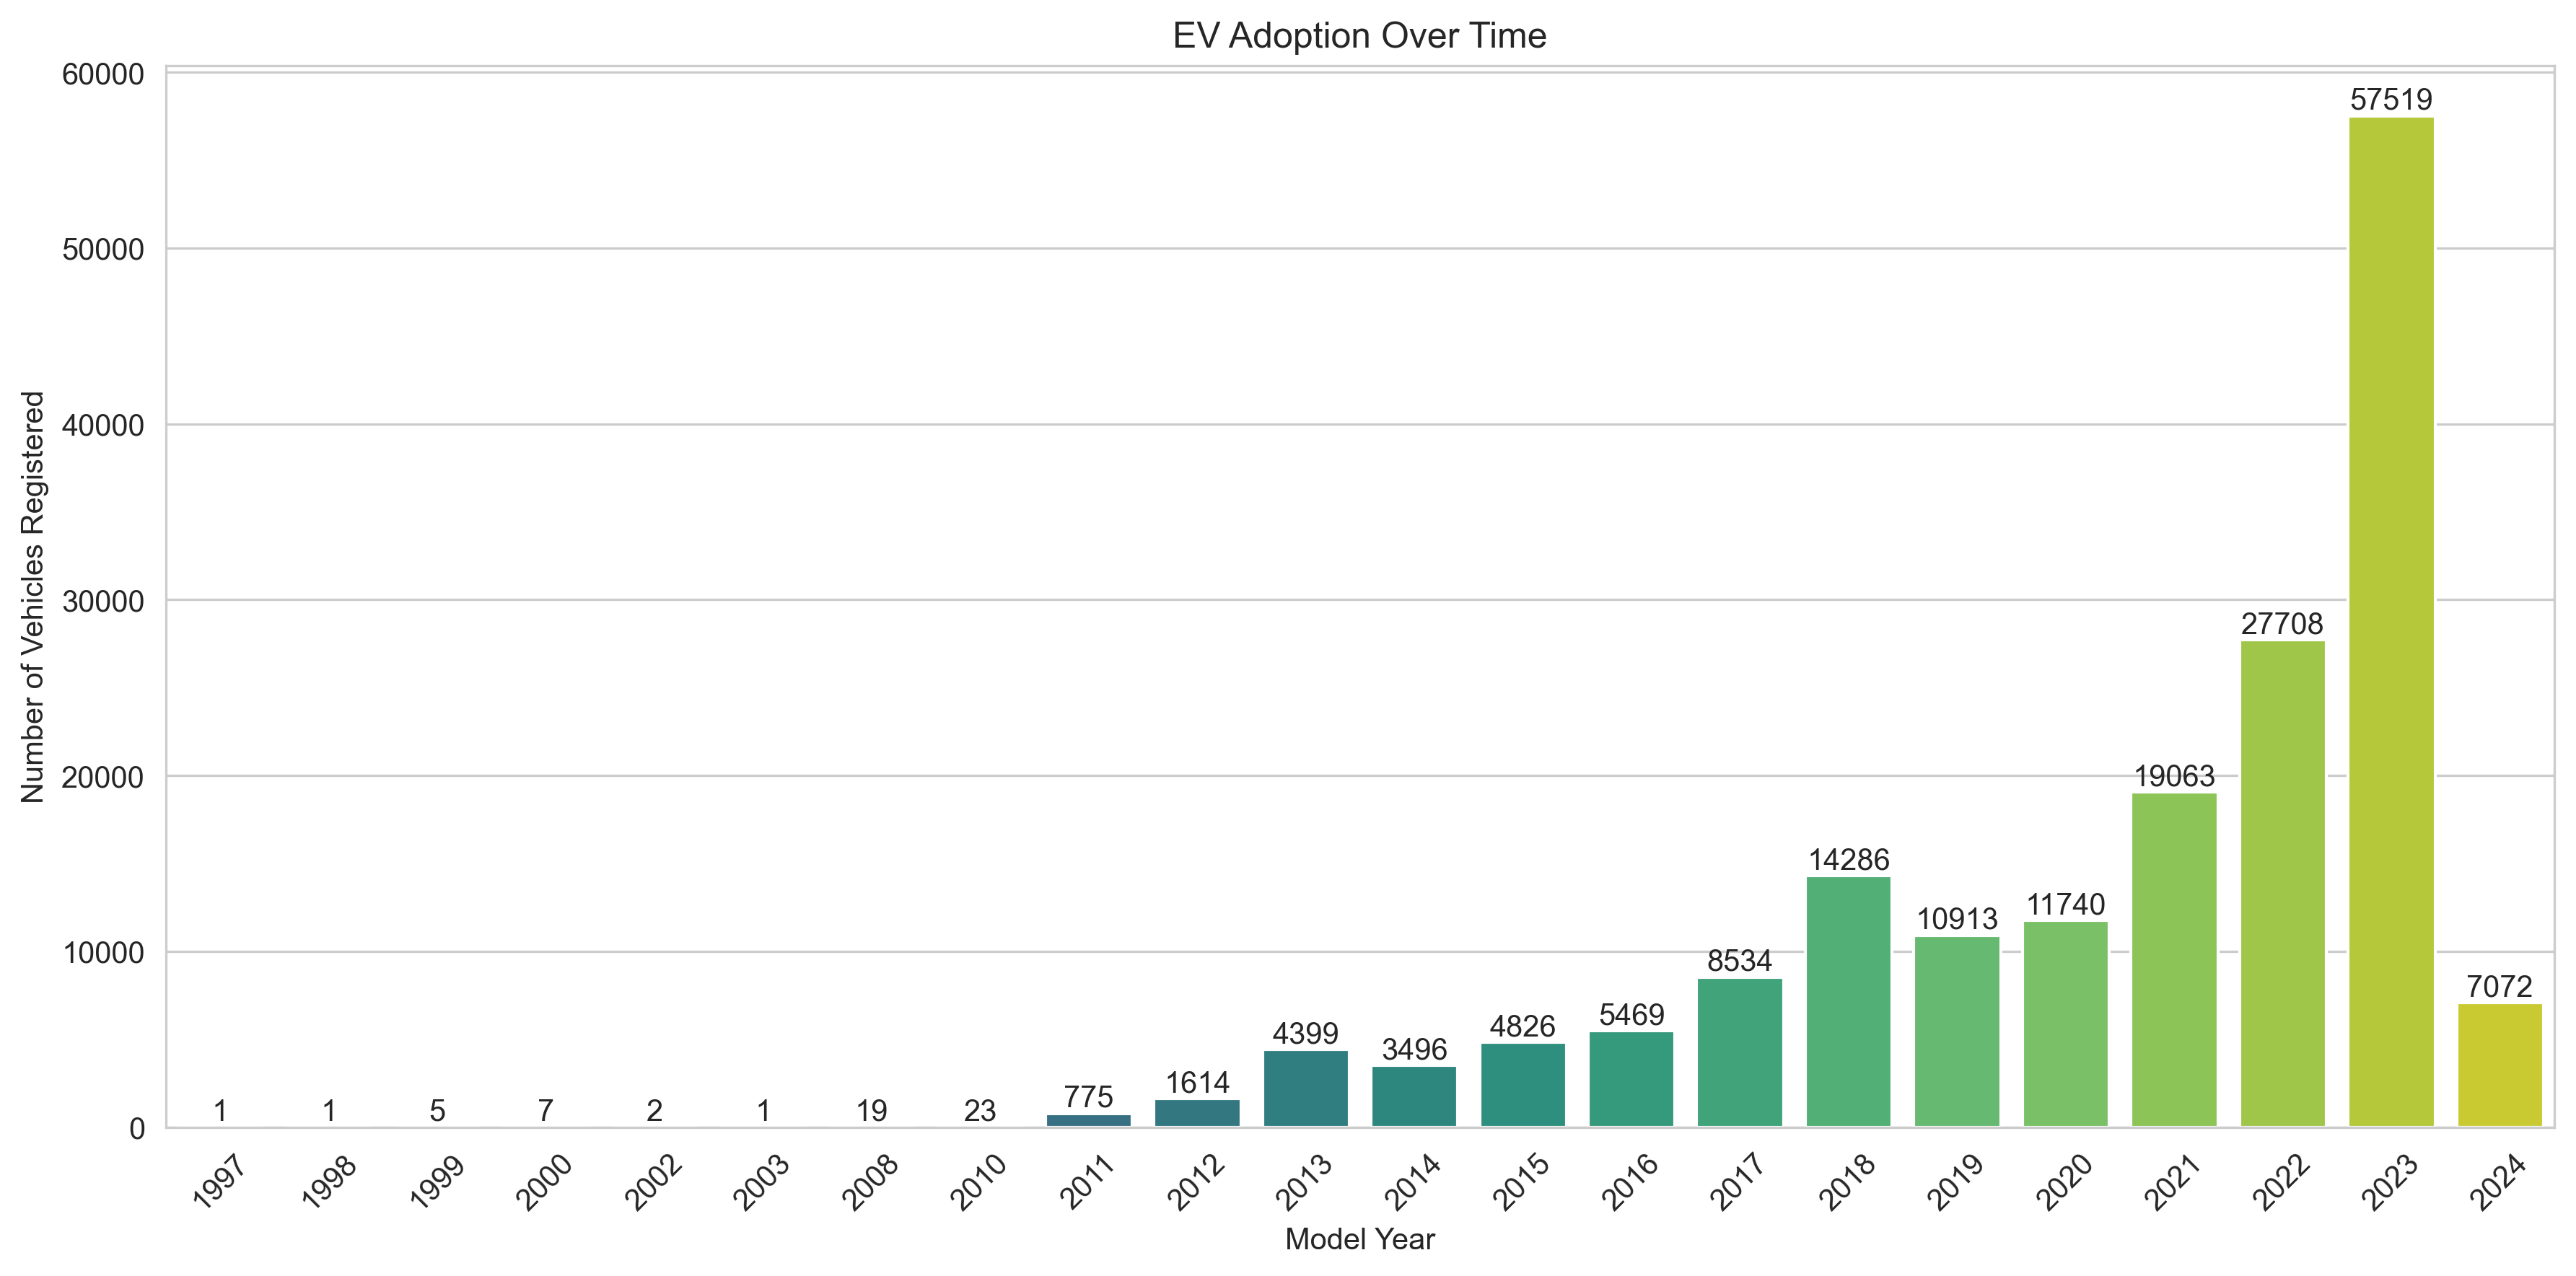

In [7]:
plt.figure(figsize=(12, 6), dpi=300)
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
barplot = sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")

plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()

### <span style="color:#138a36ff;">From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.</span>

### <span style="color:#138a36ff;">Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:</span>

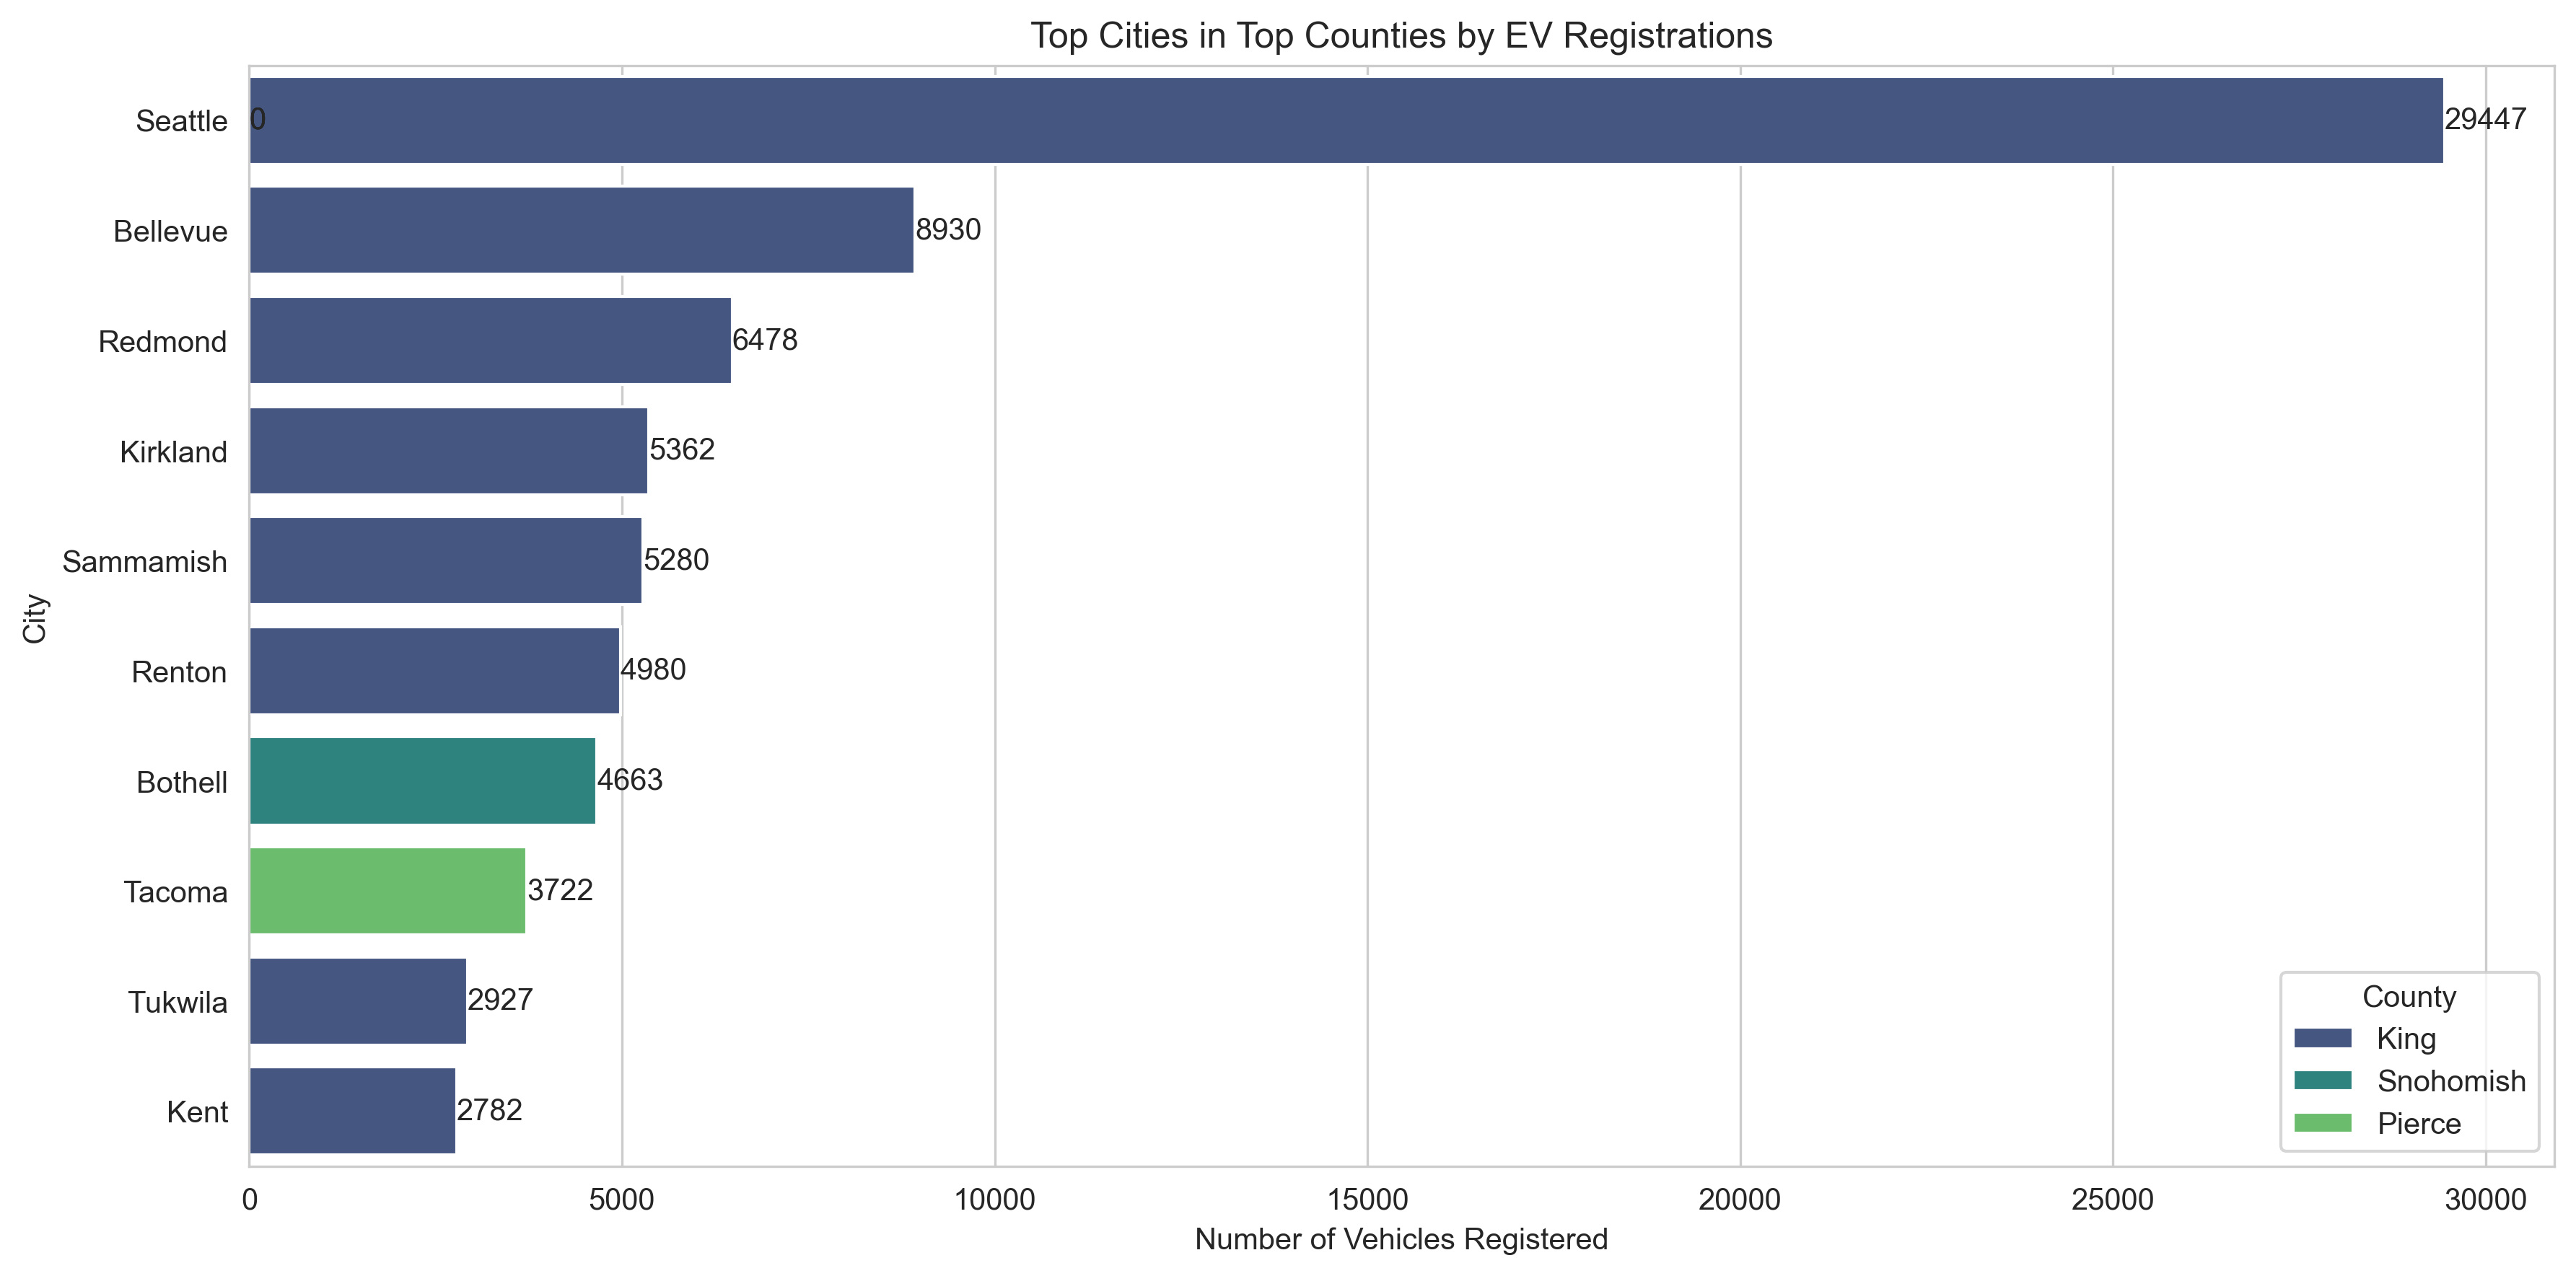

In [8]:
plt.figure(figsize=(12, 6), dpi=300)

ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_cities = ev_city_distribution_top_counties.head(10)

barplot = sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="viridis")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')

for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.5,
             p.get_y() + p.get_height() / 2,
             '{:.0f}'.format(width),
             ha='left',
             va='center')

plt.tight_layout()

plt.show()


### <span style="color:#285238ff;">Key Findings from Electric Vehicle Registration Graph</span>

<span style="color:#138a36ff;">The graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, color-coded by county. Here are the key findings:</span>

<ul style="color:#138a36ff;">
  <li><strong>Seattle (King County):</strong> Seattle has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.</li>
  
  <li><strong>Bellevue and Redmond (King County):</strong> Bellevue and Redmond follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.</li>
  
  <li><strong>Cities in Snohomish County:</strong> Cities such as Kirkland and Sammamish in Snohomish County show moderate EV registrations.</li>
  
  <li><strong>Tacoma and Tukwila (Pierce County):</strong> Tacoma and Tukwila have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.</li>
  
  <li><strong>King County Dominance:</strong> The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.</li>
  
  <li><strong>Non-uniform EV Adoption:</strong> Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.</li>
</ul>


### <span style="color:#138a36ff;">Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:</span>

C:\Users\Akashdeep Dam\AppData\Local\Temp\ipykernel_12416\3151269393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="viridis")


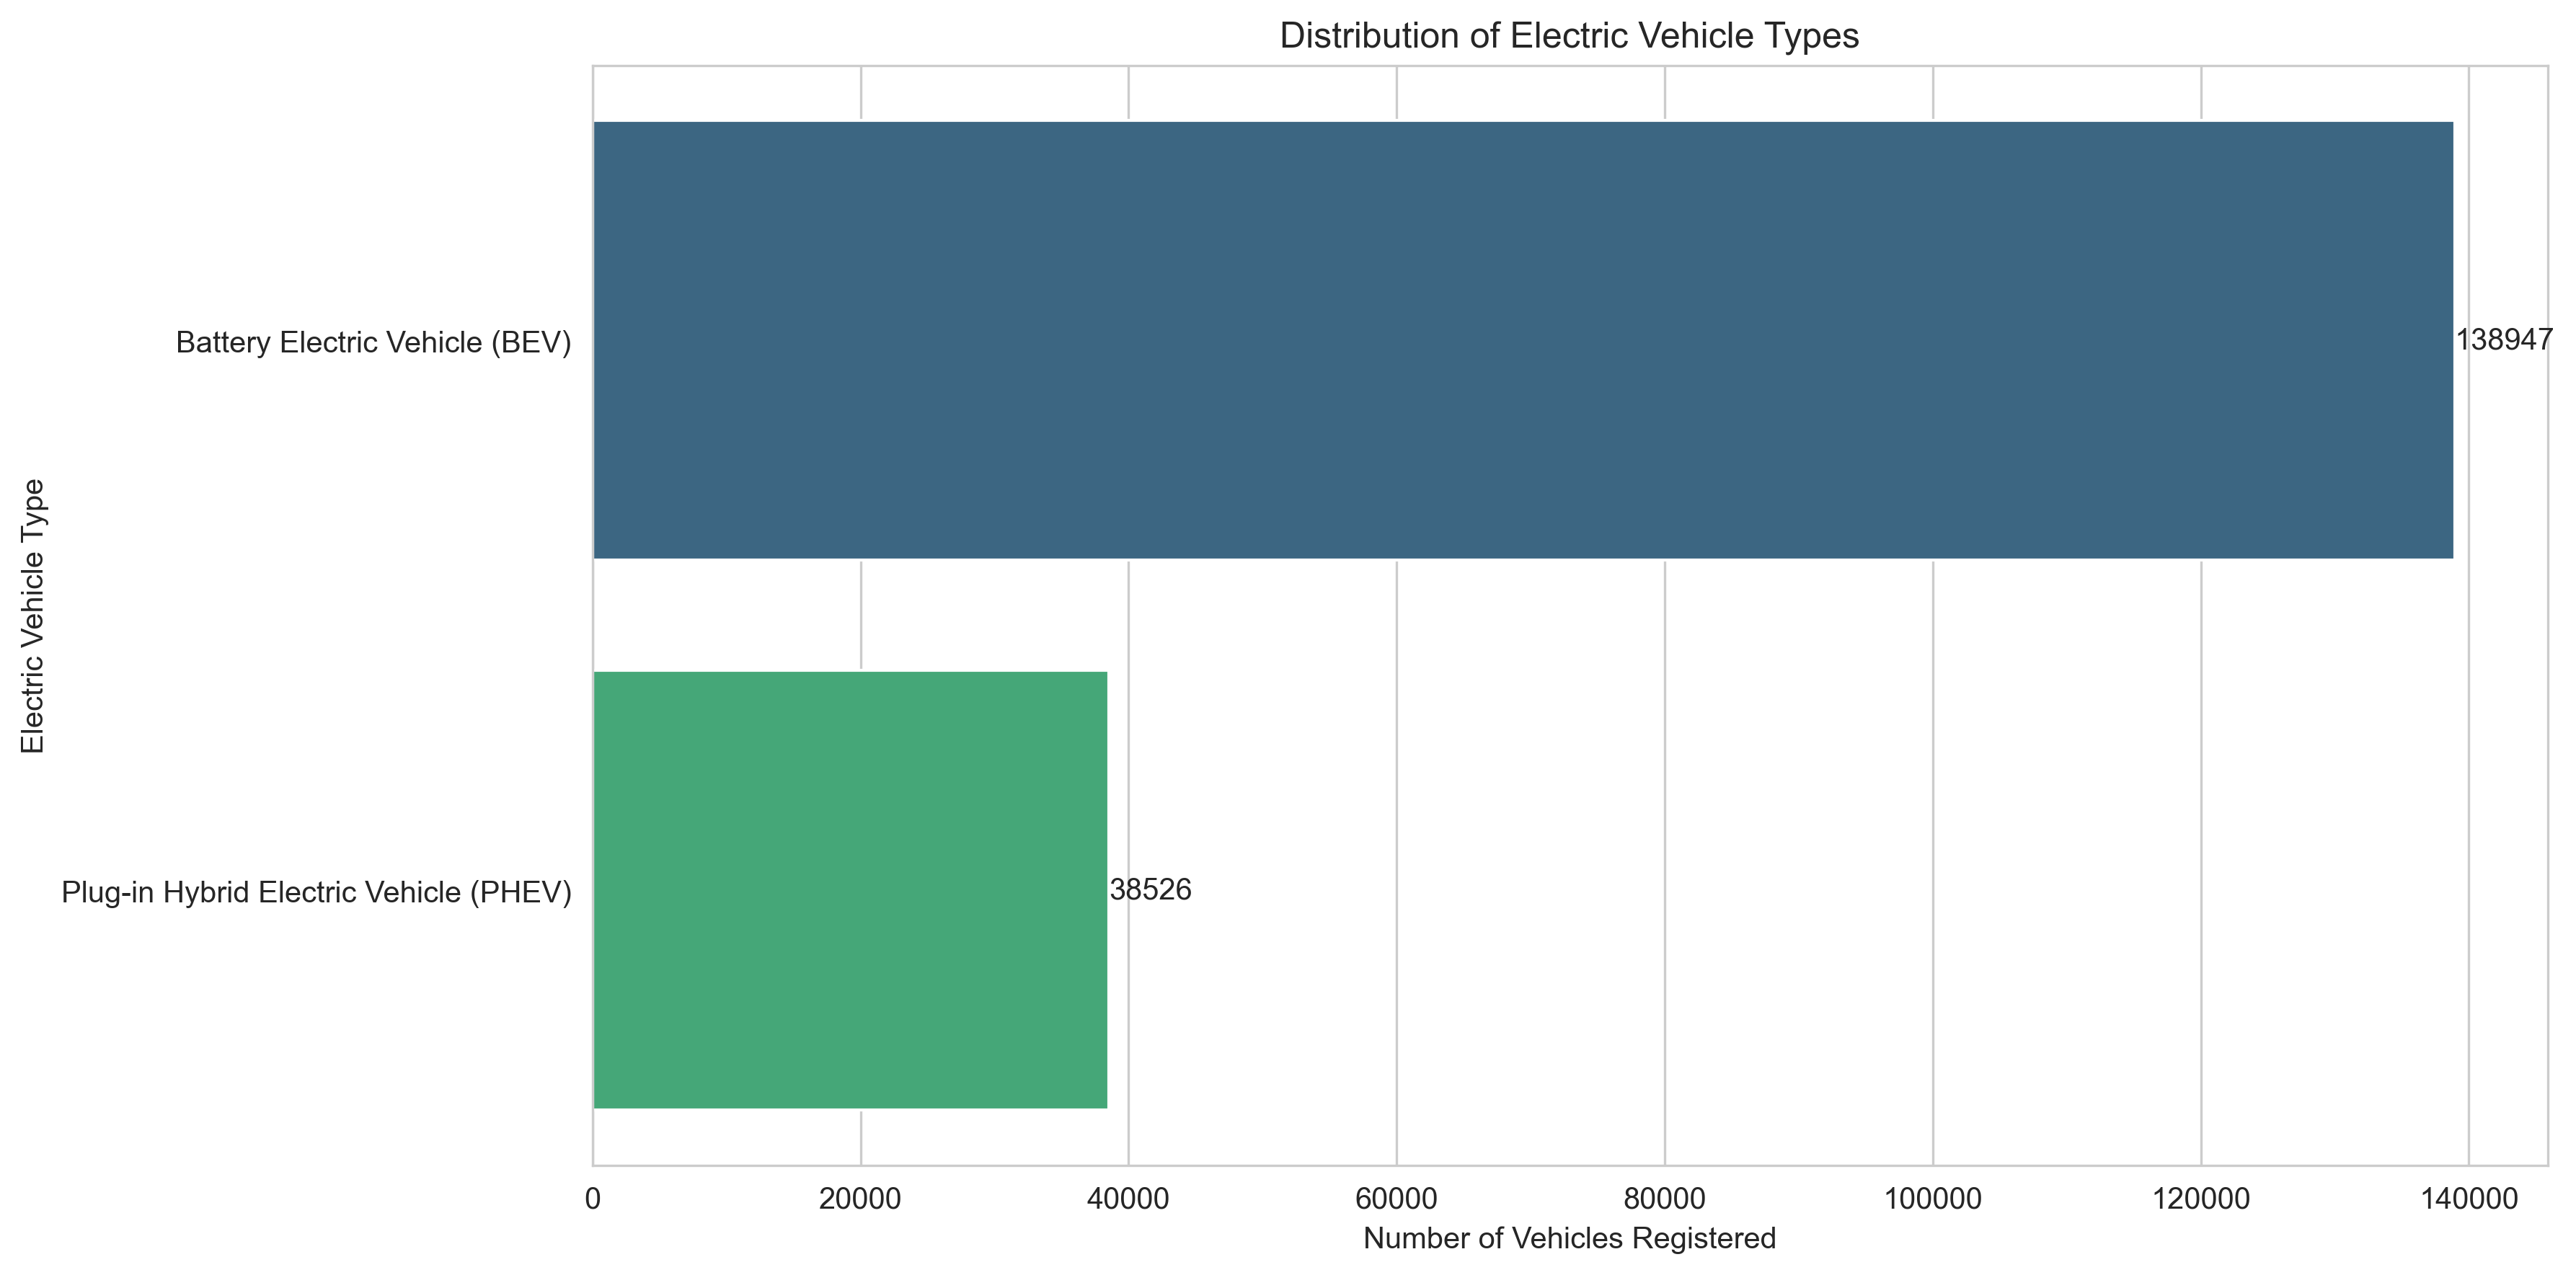

In [9]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12, 6), dpi=300)

barplot = sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="viridis")

plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')

for p in barplot.patches:
    width = p.get_width() 
    plt.text(width + 0.5, 
             p.get_y() + p.get_height() / 2, 
             '{:.0f}'.format(width), 
             ha='left', 
             va='center')

plt.tight_layout()

plt.show()

### <span style="color:#138a36ff;">The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.</span>

### <span style="color:#138a36ff;">Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.</span>

### <span style="color:#138a36ff;">So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:</span>

C:\Users\Akashdeep Dam\AppData\Local\Temp\ipykernel_12416\1512727206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="viridis")


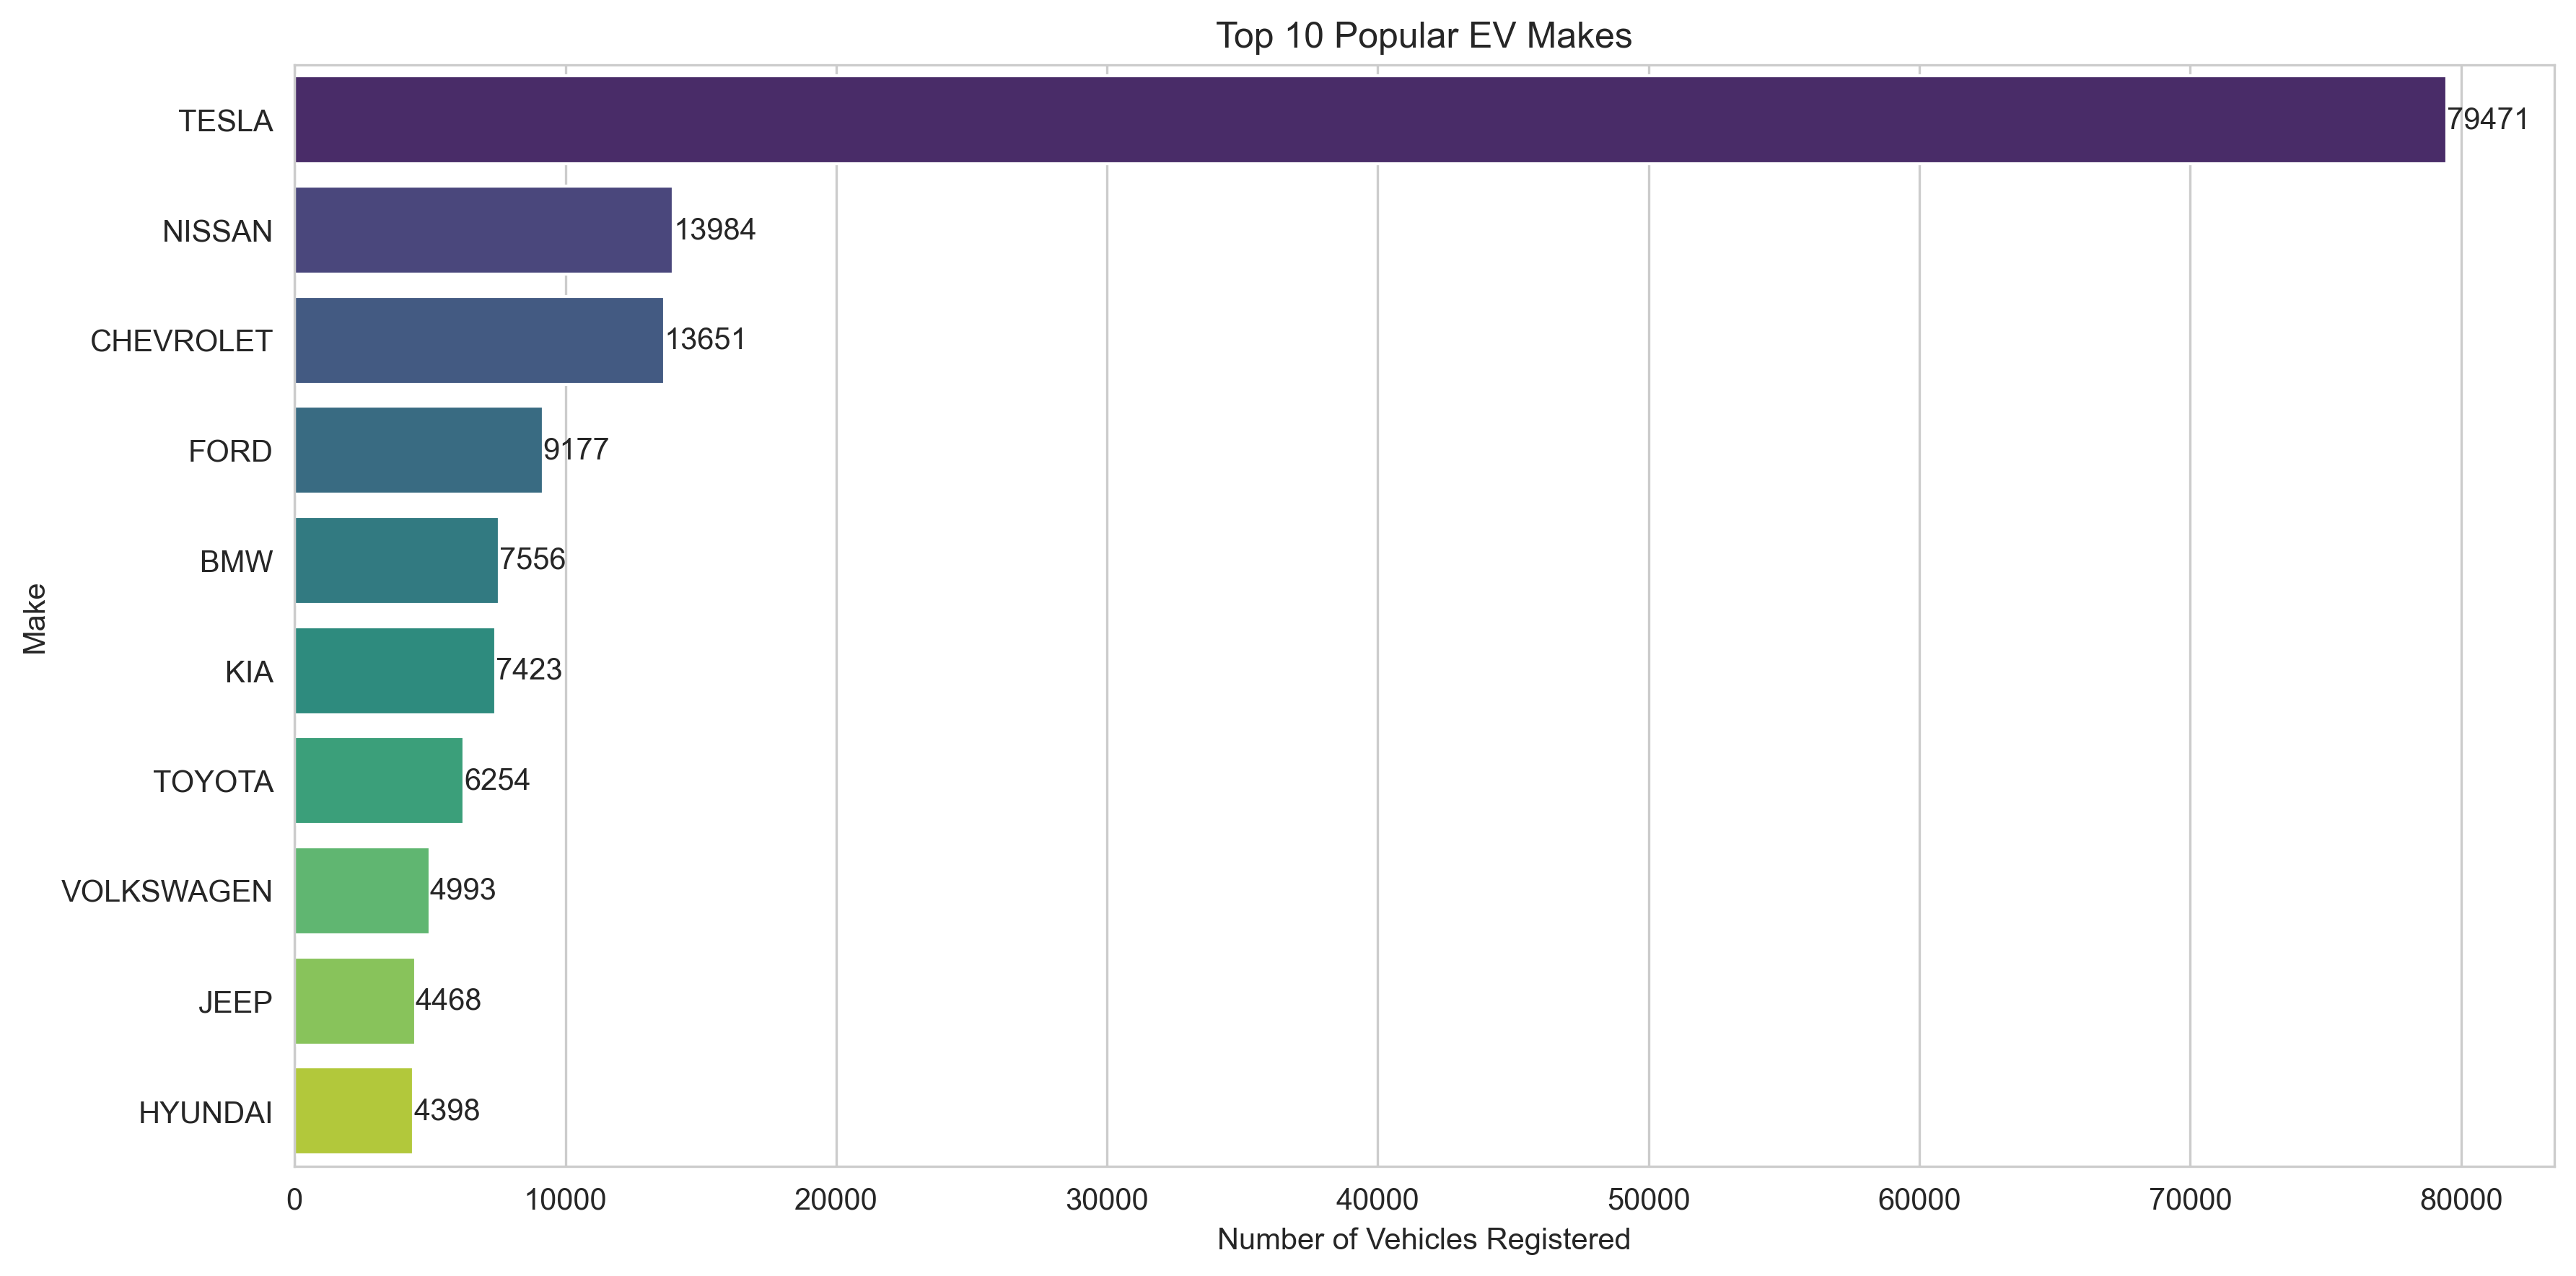

In [10]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6), dpi=300)
barplot = sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="viridis")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')

for p in barplot.patches:
    plt.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, '{:.0f}'.format(p.get_width()), ha='left', va='center')

plt.tight_layout()
plt.show()

### <span style="color:#285238ff;">Key Findings from Vehicle Registration Chart by Manufacturer</span>

<span style="color:#138a36ff;">The chart illustrates the number of electric vehicles registered by manufacturer. Here are the key findings:</span>

<ul style="color:#138a36ff;">
  <li><strong>TESLA:</strong> TESLA leads by a substantial margin with the highest number of vehicles registered.</li>
  
  <li><strong>NISSAN:</strong> NISSAN is the second most popular manufacturer, but it has significantly fewer registrations than TESLA.</li>
  
  <li><strong>CHEVROLET:</strong> CHEVROLET follows NISSAN, also with considerably fewer registrations than TESLA.</li>
  
  <li><strong>Other Manufacturers:</strong> FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.</li>
</ul>

### <span style="color:#138a36ff;">Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:</span>

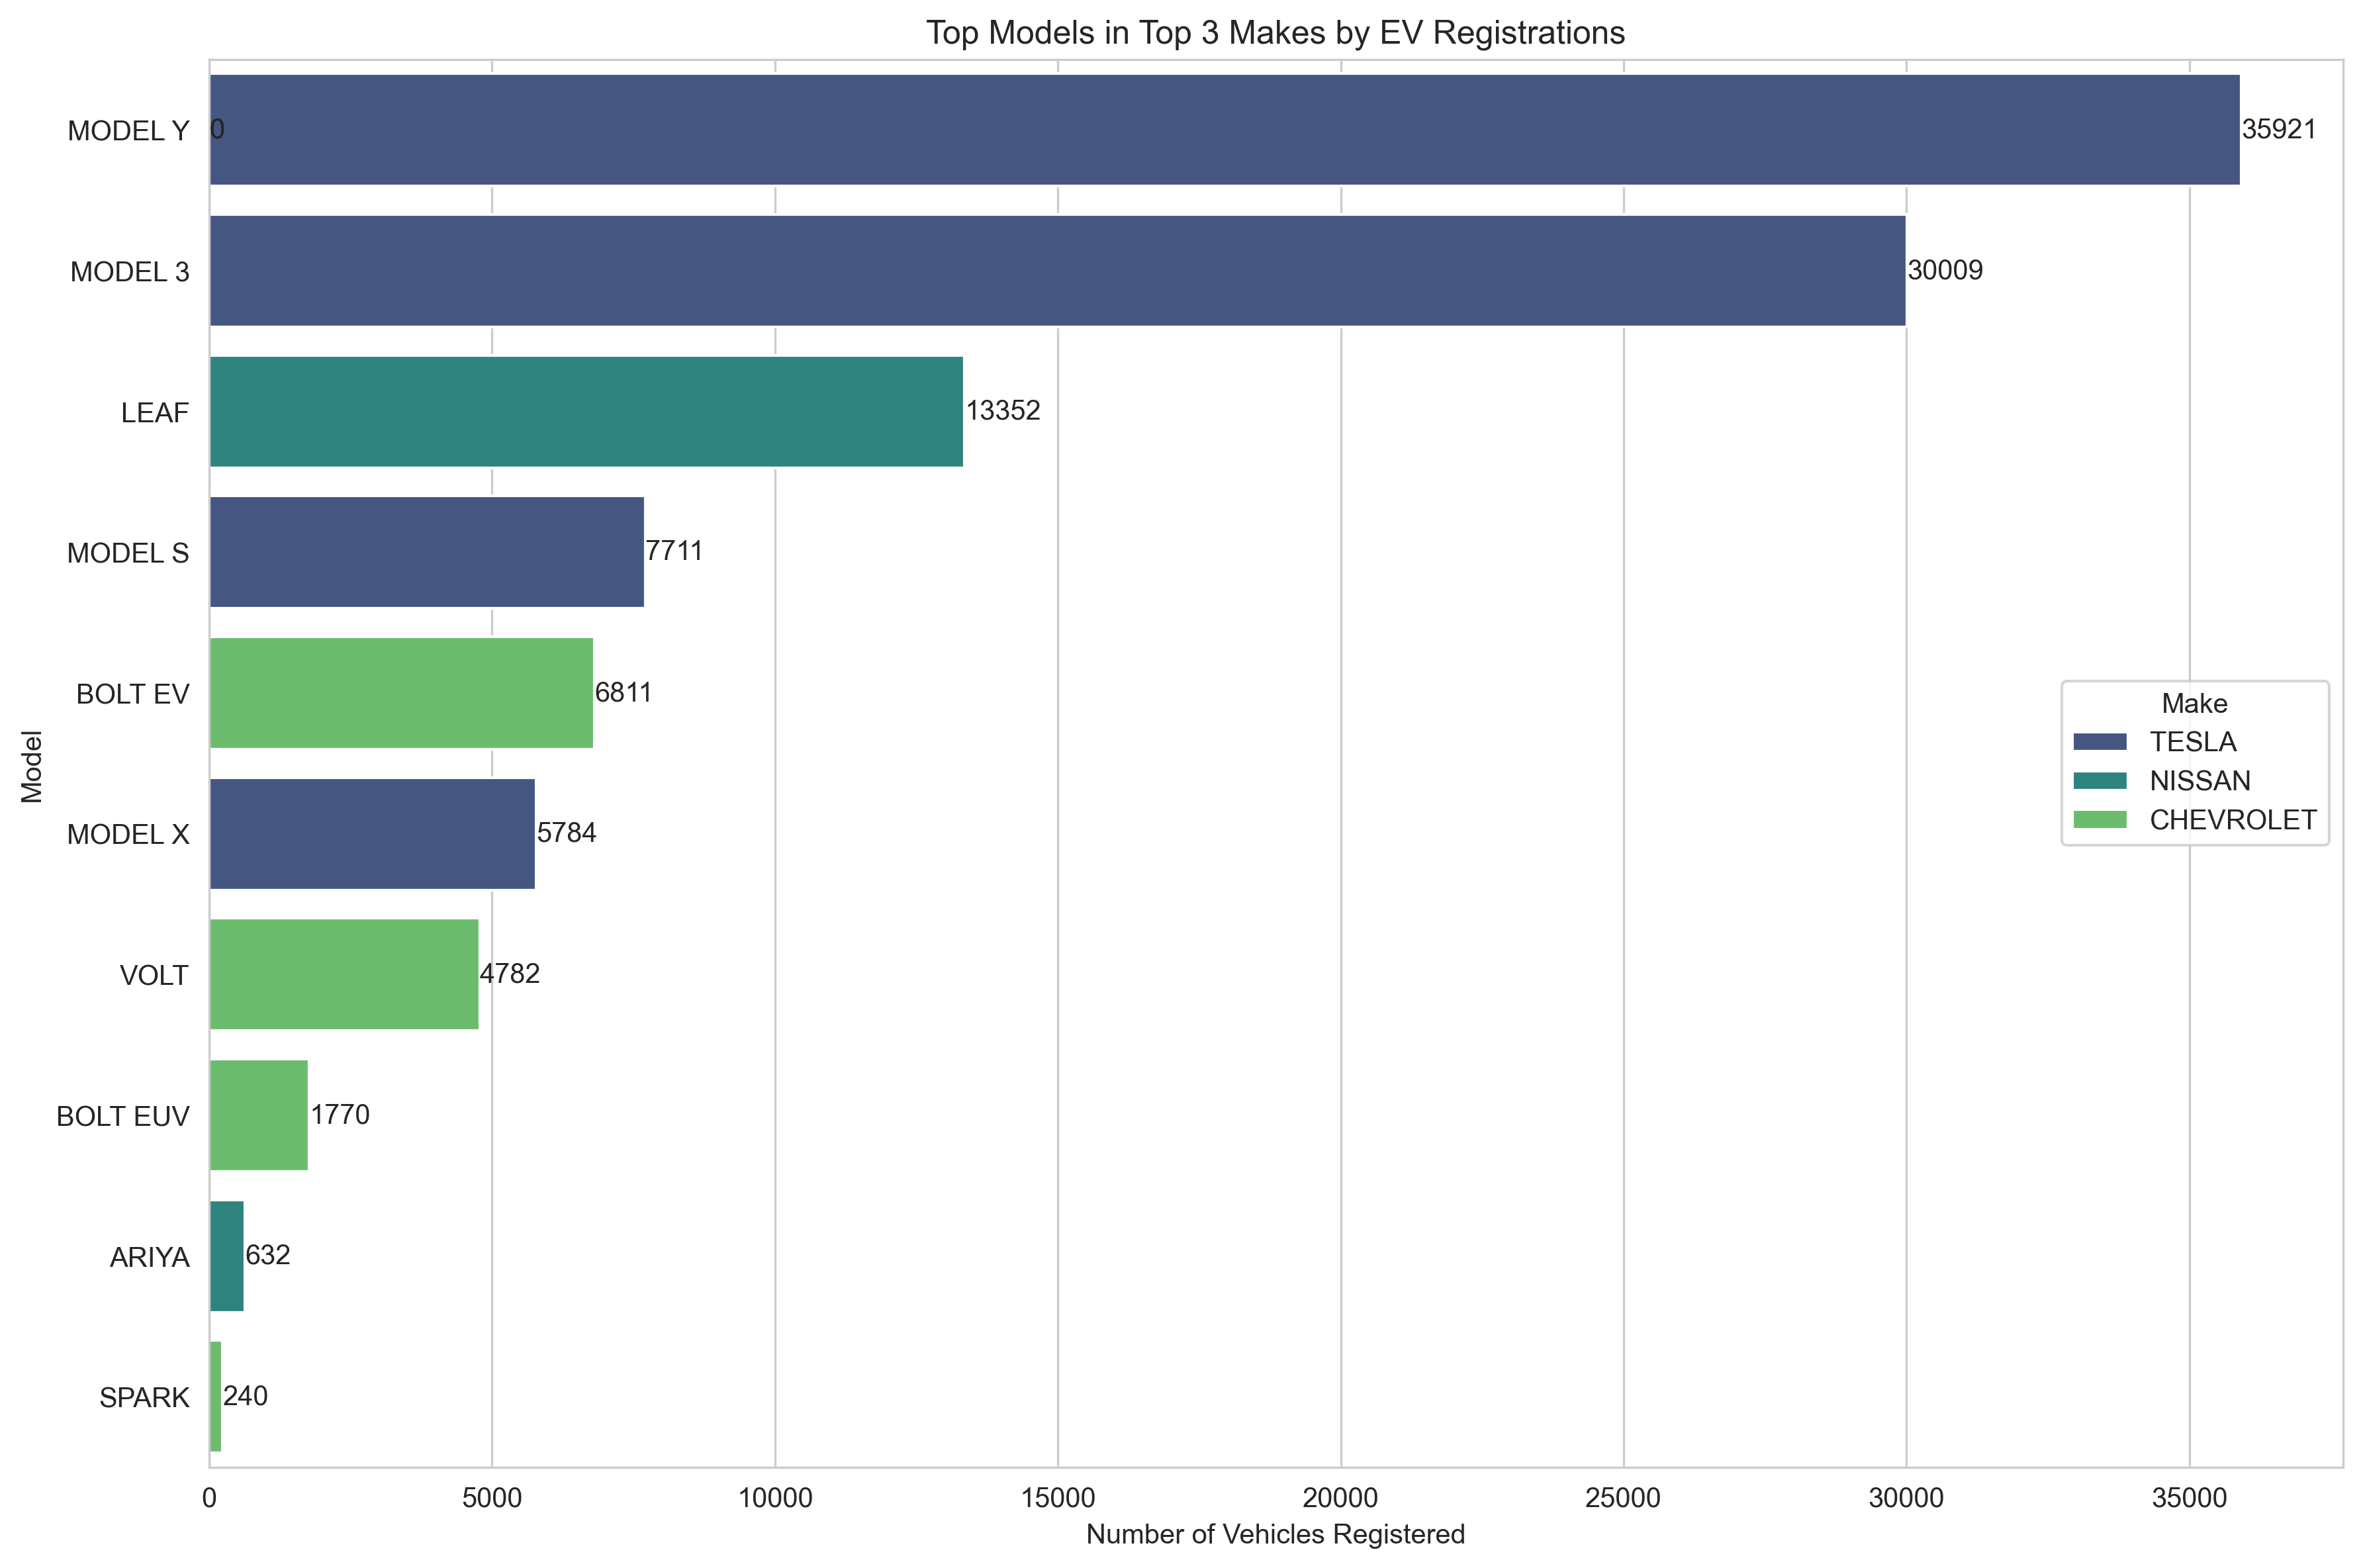

In [11]:
top_3_makes = ev_make_distribution.head(3).index
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8), dpi=300)
barplot = sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')

for p in barplot.patches:
    plt.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, '{:.0f}'.format(p.get_width()), ha='left', va='center')

plt.tight_layout()
plt.show()

### <span style="color:#285238ff;">Key Findings from Electric Vehicle Registrations by Model</span>

<span style="color:#138a36ff;">The graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:</span>

<ul style="color:#138a36ff;">
  <li><strong>TESLA's MODEL Y and MODEL 3:</strong> TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.</li>
  
  <li><strong>NISSAN's LEAF:</strong> NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.</li>
  
  <li><strong>TESLA's MODEL S and MODEL X:</strong> TESLA’s MODEL S and MODEL X also have a significant number of registrations.</li>
  
  <li><strong>CHEVROLET's BOLT EV and VOLT:</strong> CHEVROLET’s BOLT EV and VOLT are next in the ranking with considerable registrations, followed by BOLT EUV.</li>
  
  <li><strong>Least Registered Models:</strong> NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.</li>
</ul>


### <span style="color:#138a36ff;">Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:</span>

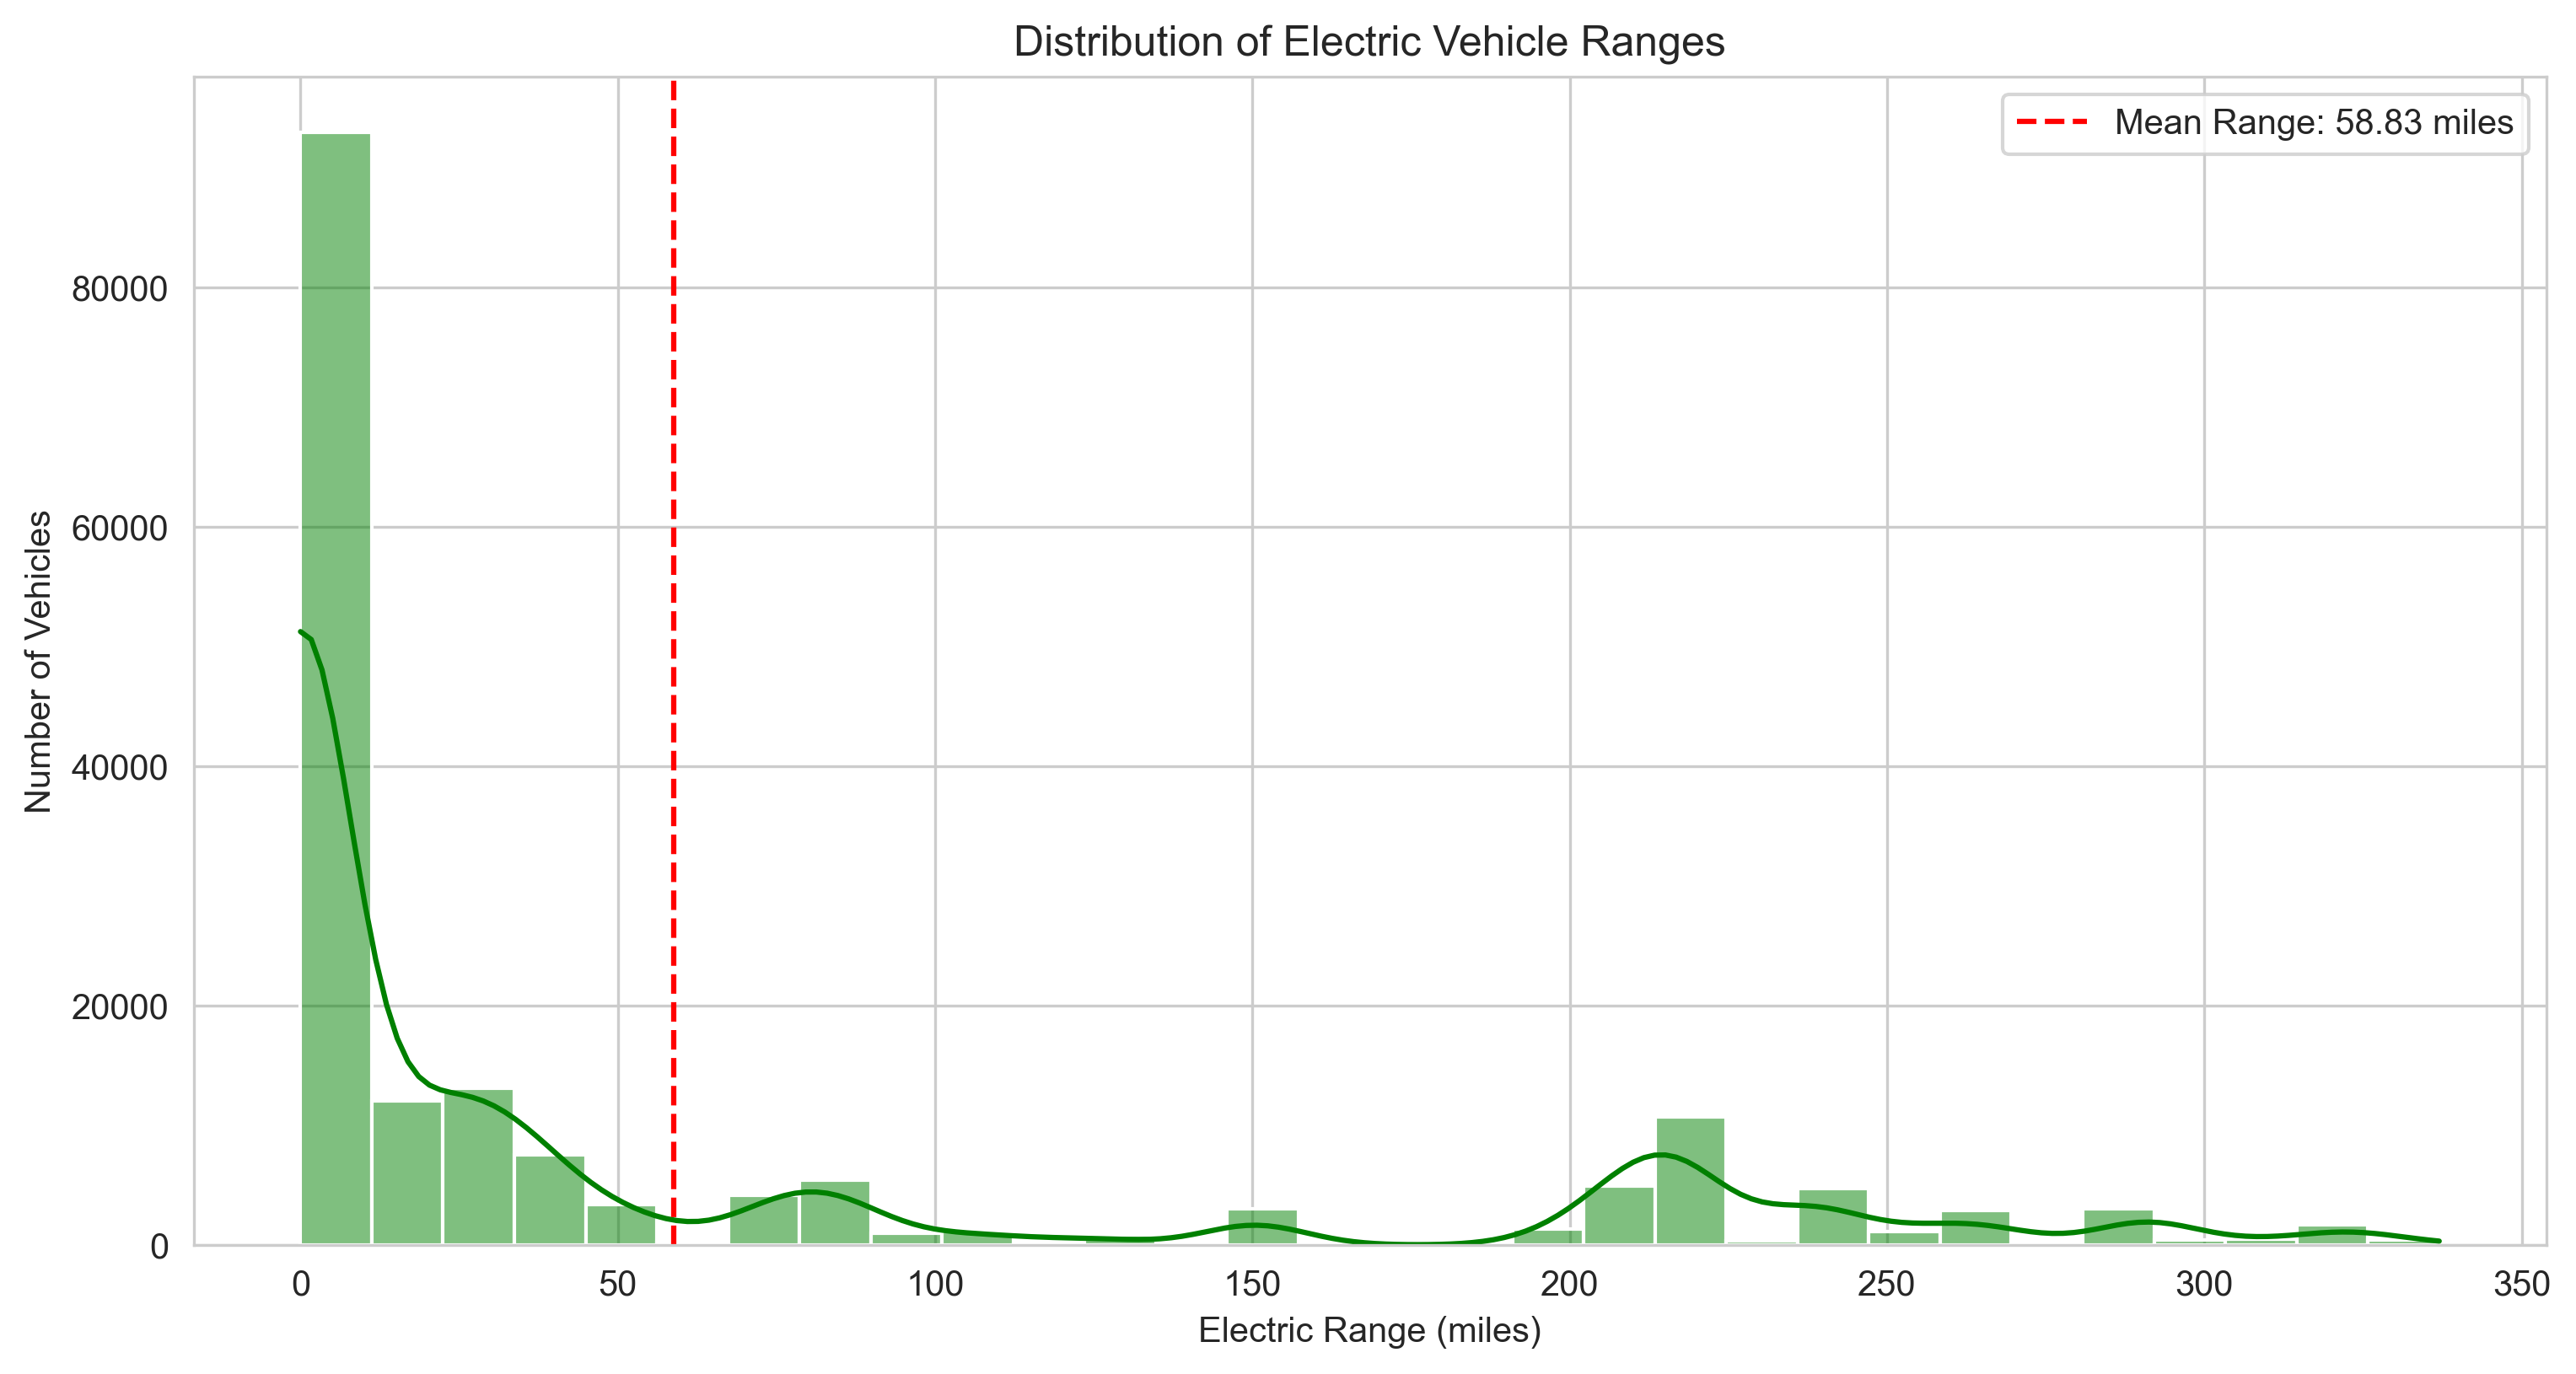

In [12]:
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='green')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

### <span style="color:#285238ff;">Key Observations from Mean Electric Range Graph</span>

<span style="color:#138a36ff;">The graph illustrates the mean electric range of vehicles. Key observations from the graph include:</span>

<ul style="color:#138a36ff;">
  <li><strong>High Frequency of Low-Range Vehicles:</strong> There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.</li>
  
  <li><strong>Right-Skewed Distribution:</strong> The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.</li>
  
  <li><strong>Mean Electric Range:</strong> The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.</li>
  
  <li><strong>Range Distribution:</strong> Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.</li>
</ul>



### <span style="color:#138a36ff;">It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.</span>

### <span style="color:#138a36ff;">Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):</span>

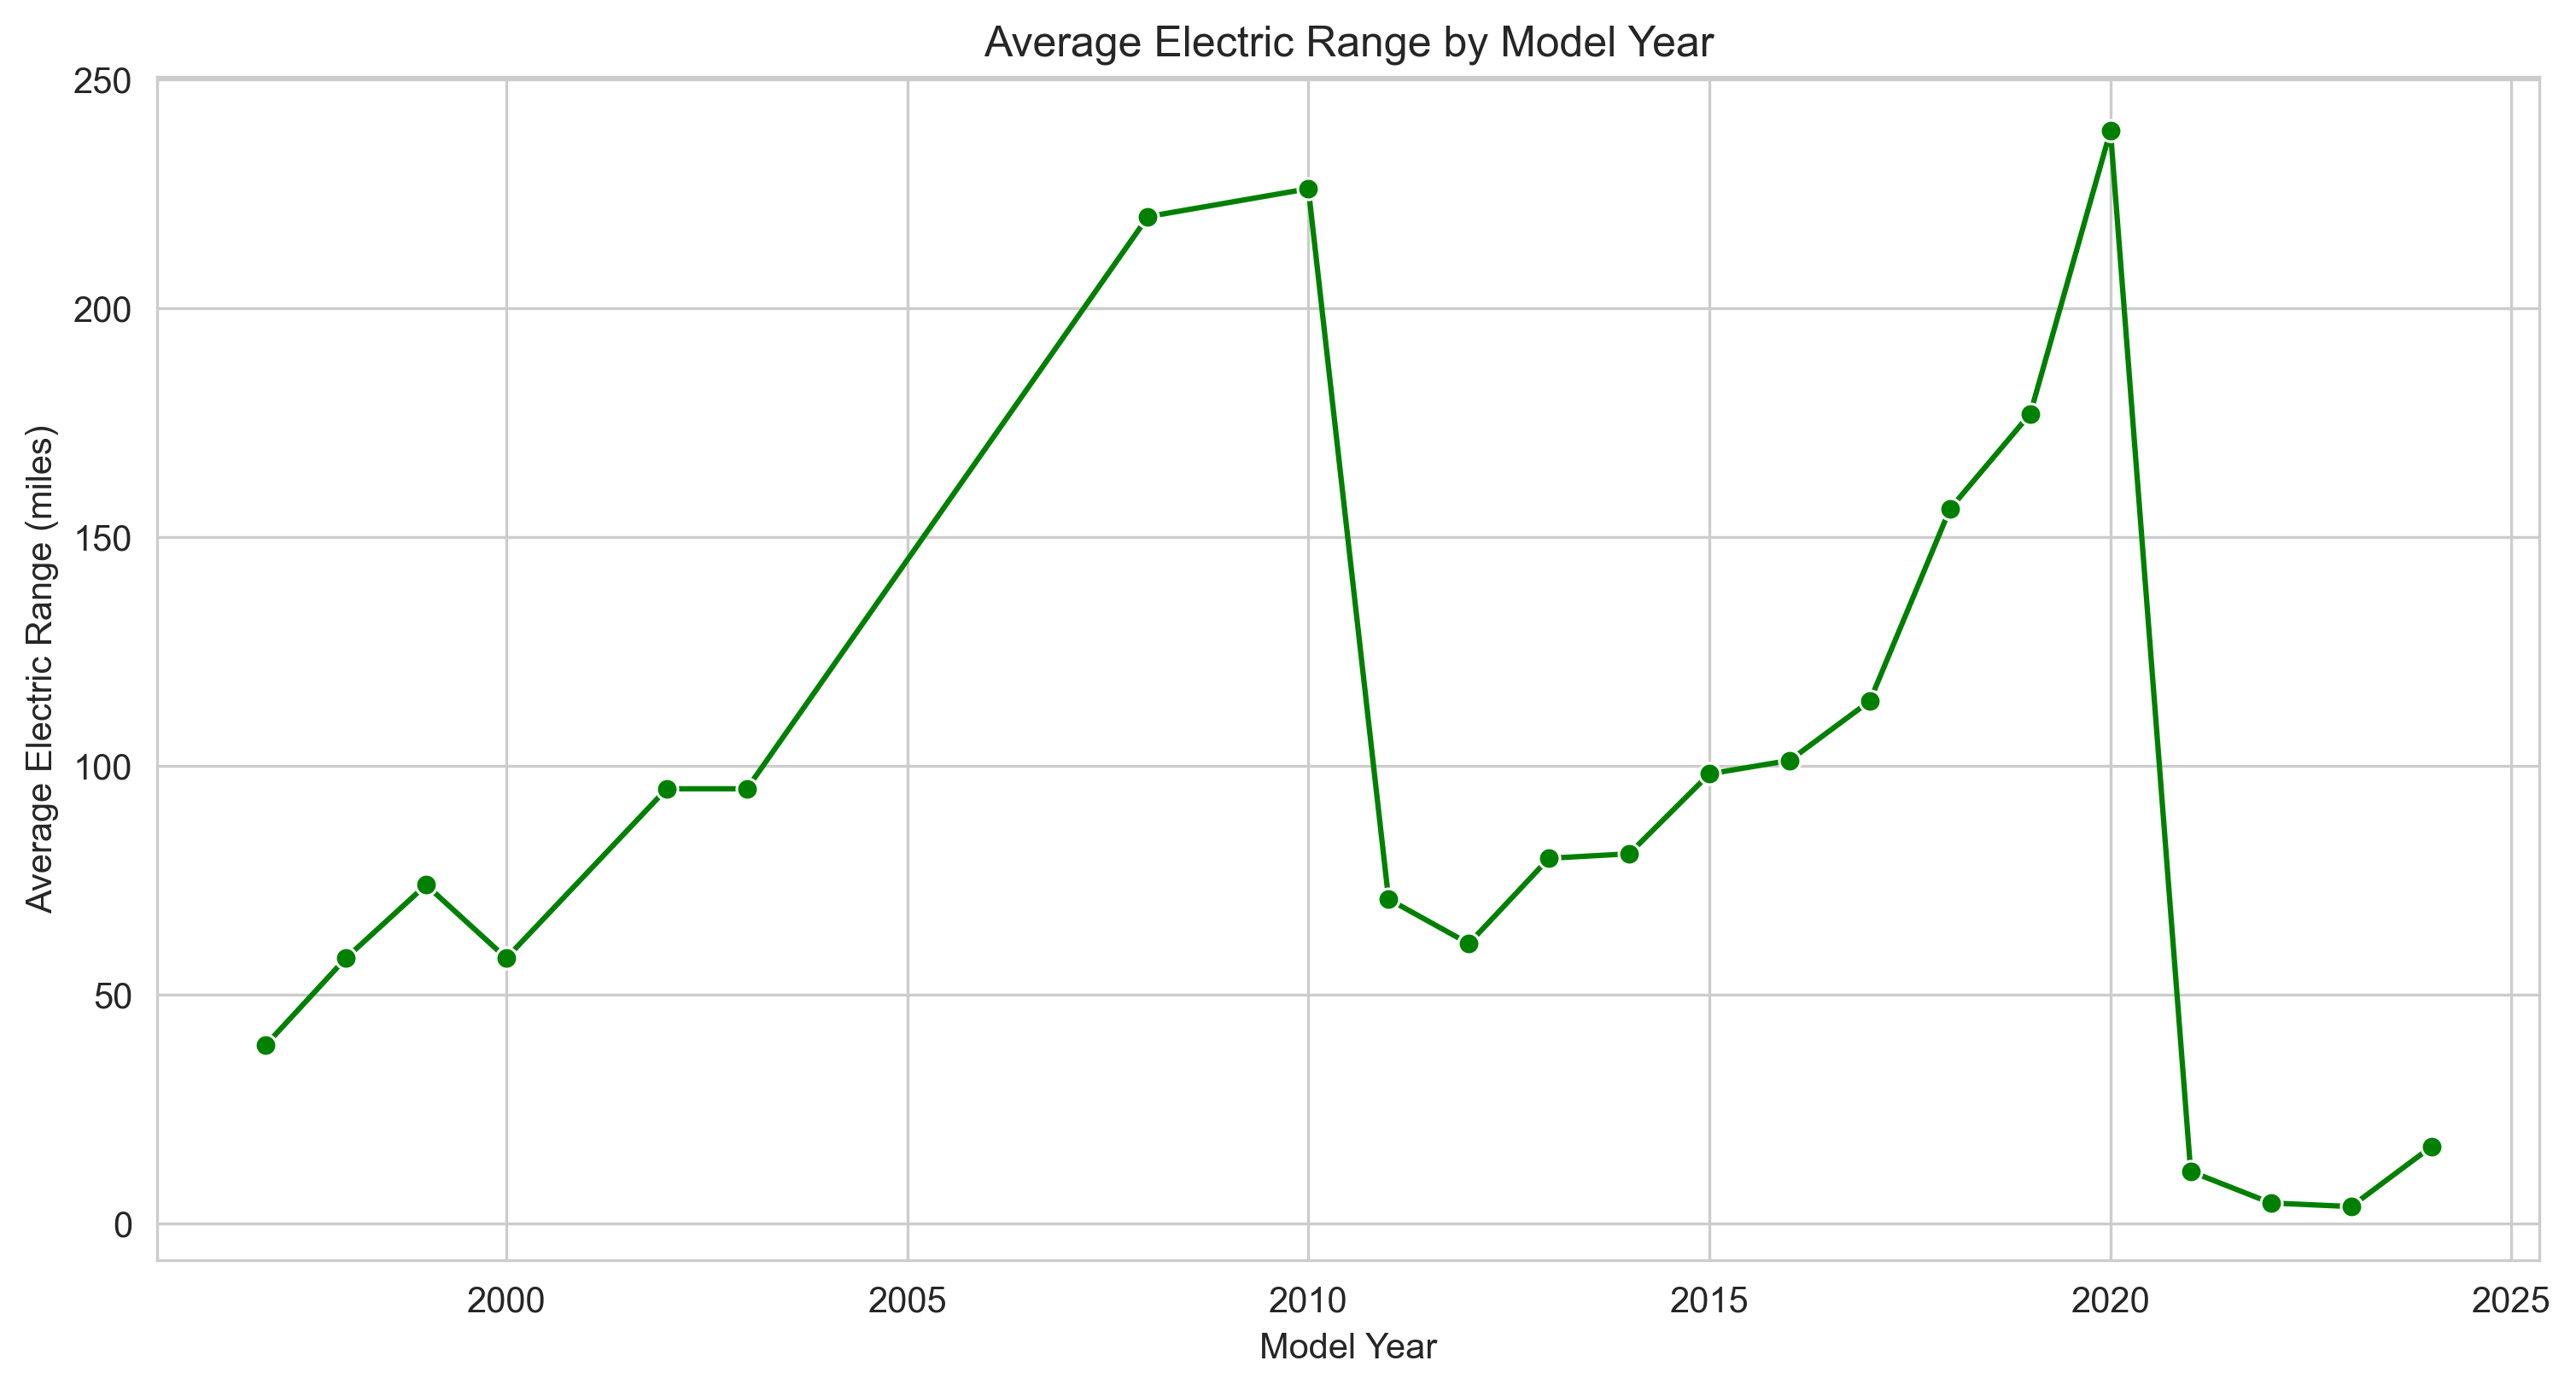

In [13]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

### <span style="color:#285238ff;">Key Findings from the Progression of Average Electric Range Graph</span>

<span style="color:#138a36ff;">The graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph include:</span>

<ul style="color:#138a36ff;">
  <li><strong>Upward Trend Over the Years:</strong> There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.</li>
  
  <li><strong>Peak Around 2020:</strong> There is a noticeable peak around the year 2020 when the average range reaches its highest point.</li>
  
  <li><strong>Post-2020 Decline:</strong> Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.</li>
  
  <li><strong>Recent Recovery:</strong> After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.</li>
</ul>


### <span style="color:#138a36ff;">The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.</span>

### <span style="color:#138a36ff;">Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:</span>

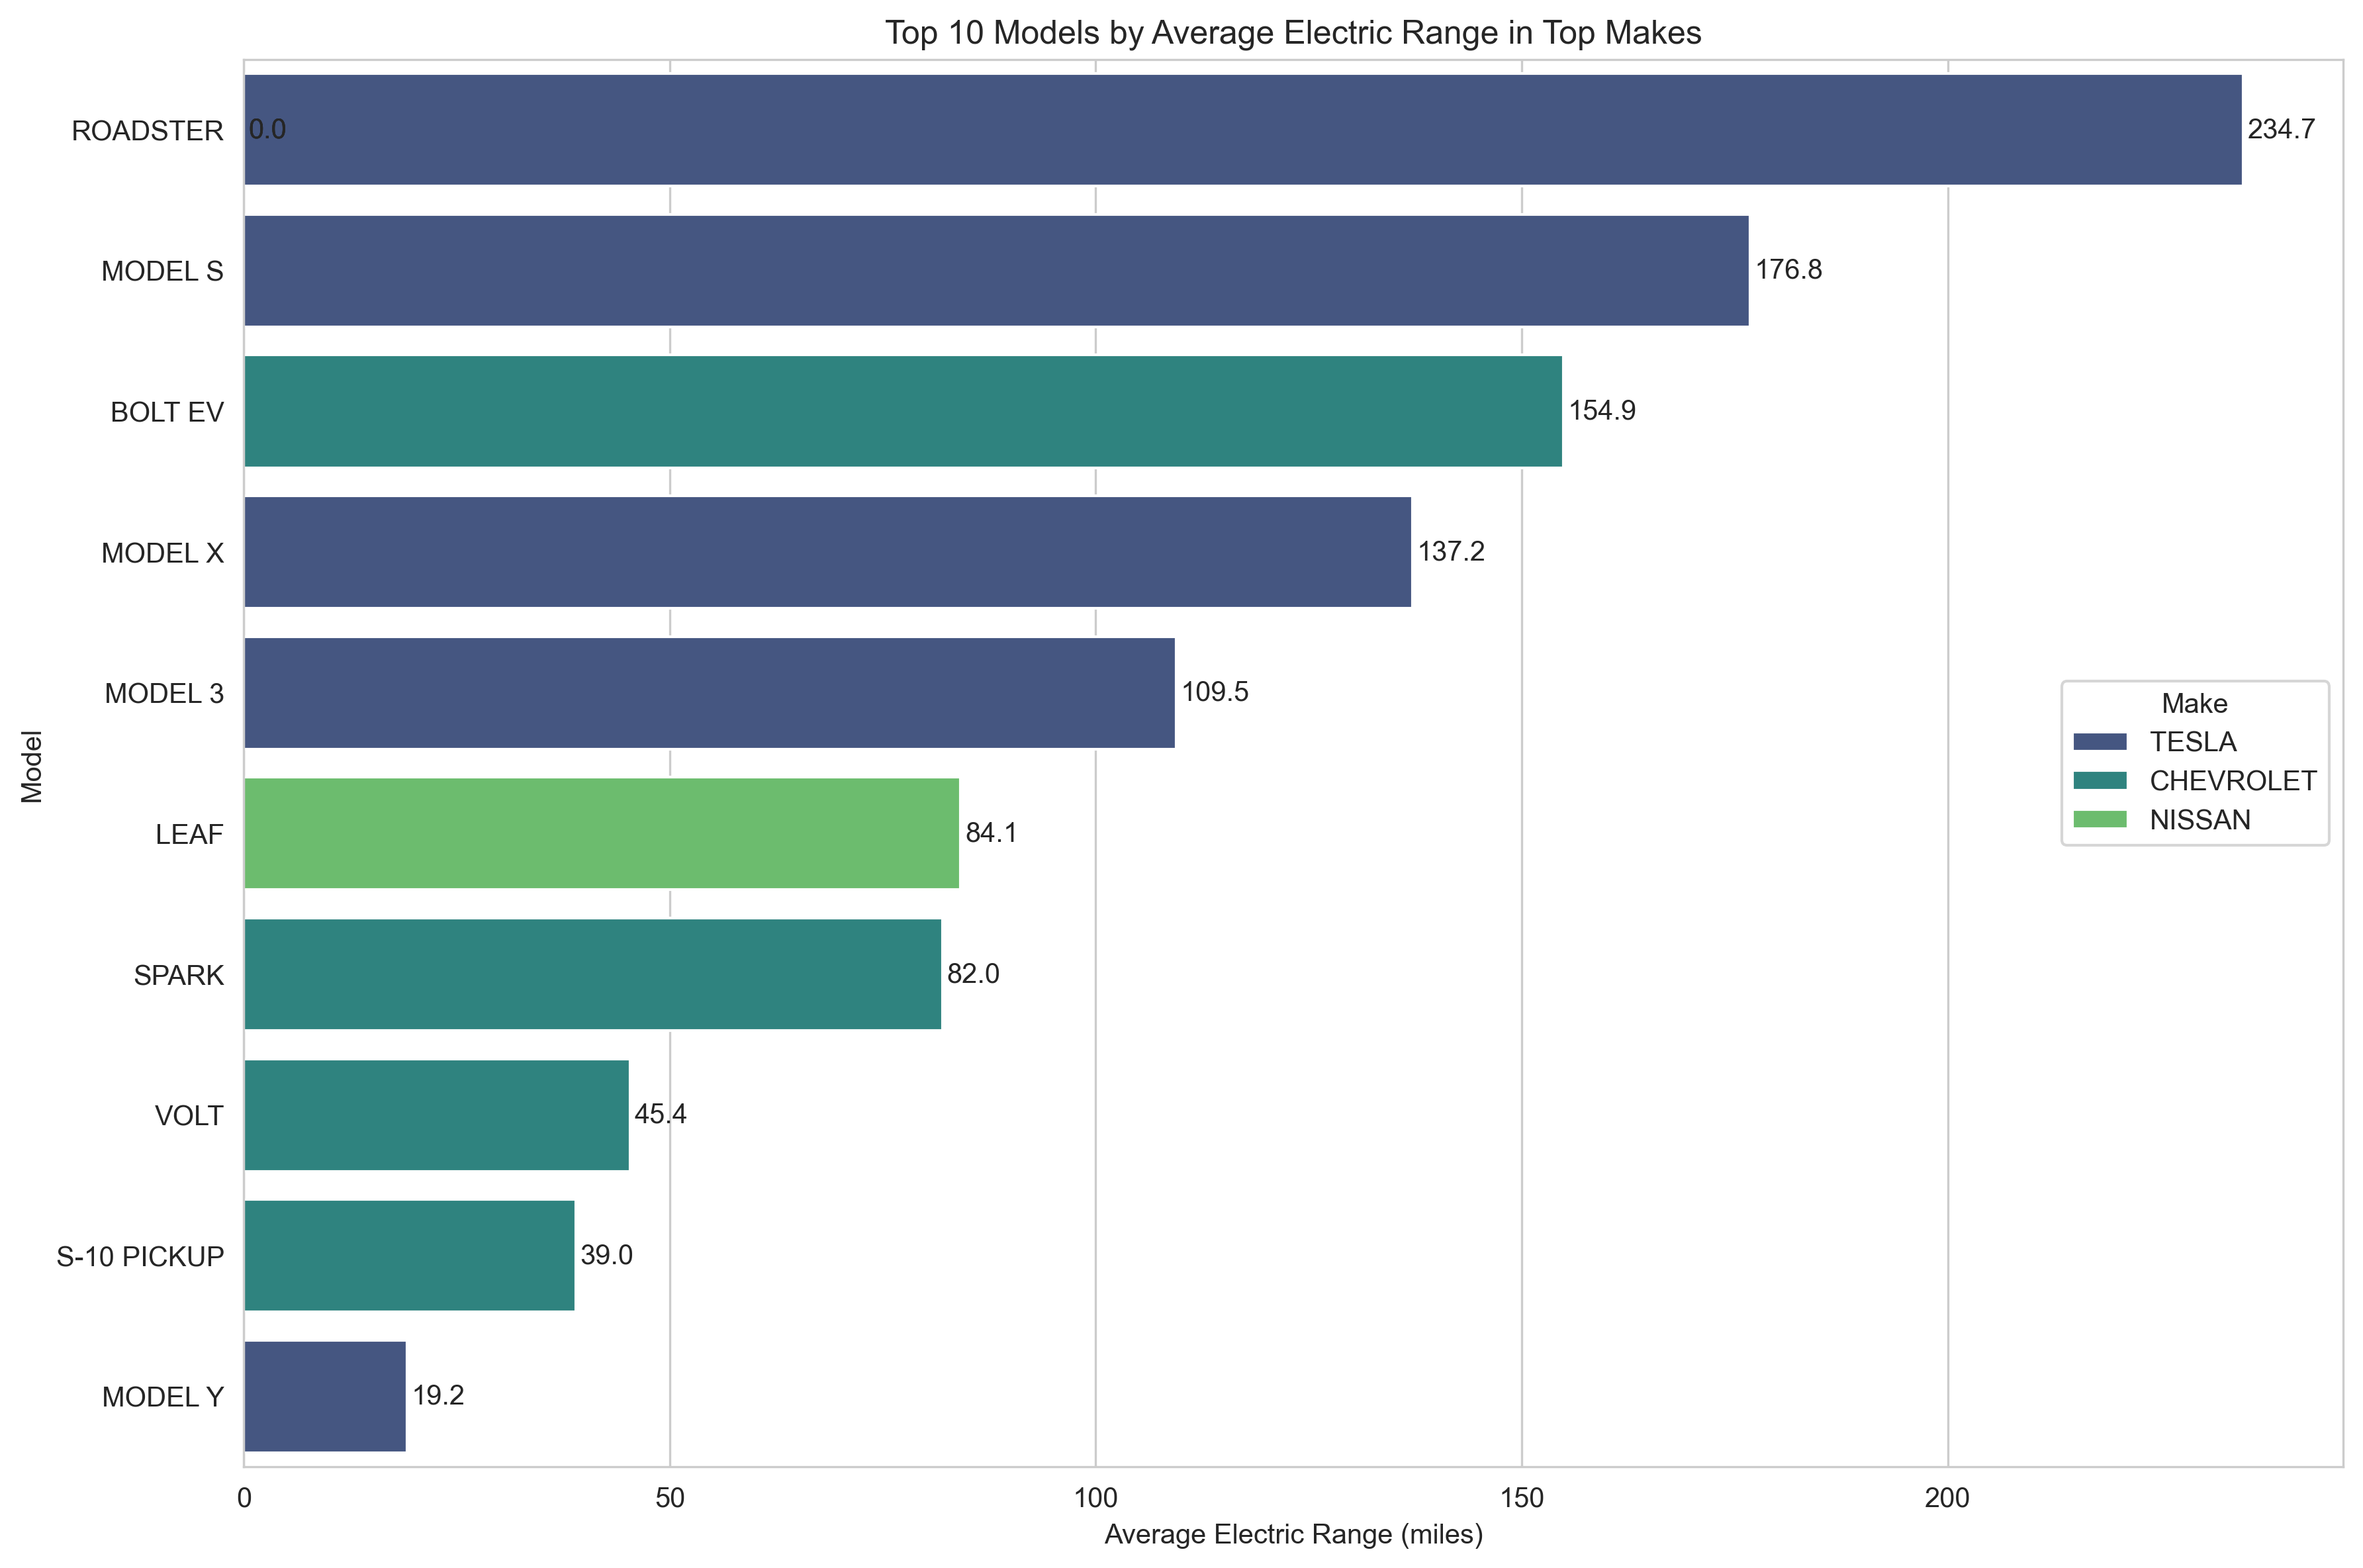

In [14]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8), dpi=300)
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="viridis")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')

for p in barplot.patches:
    plt.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, '{:.1f}'.format(p.get_width()), ha='left', va='center')

plt.tight_layout()
plt.show()


### <span style="color:#138a36ff;">The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.</span>

### <span style="color:#285238ff;">Estimated Market Size Analysis of Electric Vehicles in the United States</span>

### <span style="color:#138a36ff;">Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:</span>

In [15]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

### <span style="color:#285238ff;">Summary of Electric Vehicle Registrations and Forecasting Steps</span>

<span style="color:#138a36ff;">The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains data until March. Here’s a summary of EV registrations for recent years:</span>

<ul style="color:#138a36ff;">
  <li><strong>2021:</strong> There were 19,063 EVs registered.</li>
  
  <li><strong>2022:</strong> The number increased to 27,708 EVs.</li>
  
  <li><strong>2023:</strong> A significant jump to 57,519 EVs was observed.</li>
  
  <li><strong>2024:</strong> Currently, 7,072 EVs are registered, which suggests partial data.</li>
</ul>

<span style="color:#138a36ff;">To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate-based approach from previous complete years. Here are the steps:</span>

<ul style="color:#138a36ff;">
  <li><strong>Calculate CAGR:</strong> We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (e.g., 2023) and an earlier year to estimate the growth trend.</li>
  
  <li><strong>Project 2024 Figures:</strong> Using the CAGR, we can forecast the total number of EVs expected to be registered by the end of 2024.</li>
  
  <li><strong>Estimate Market Size for Next Five Years:</strong> Based on the calculated growth rate, we can also estimate the market size for the next five years, providing insights into future trends.</li>
</ul>



In [16]:
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

def exp_growth(x, a, b):
    return a * np.exp(b * x)

x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

params, covariance = curve_fit(exp_growth, x_data, y_data)

forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


### <span style="color:#285238ff;">Now, let’s plot the estimated market size data:</span>

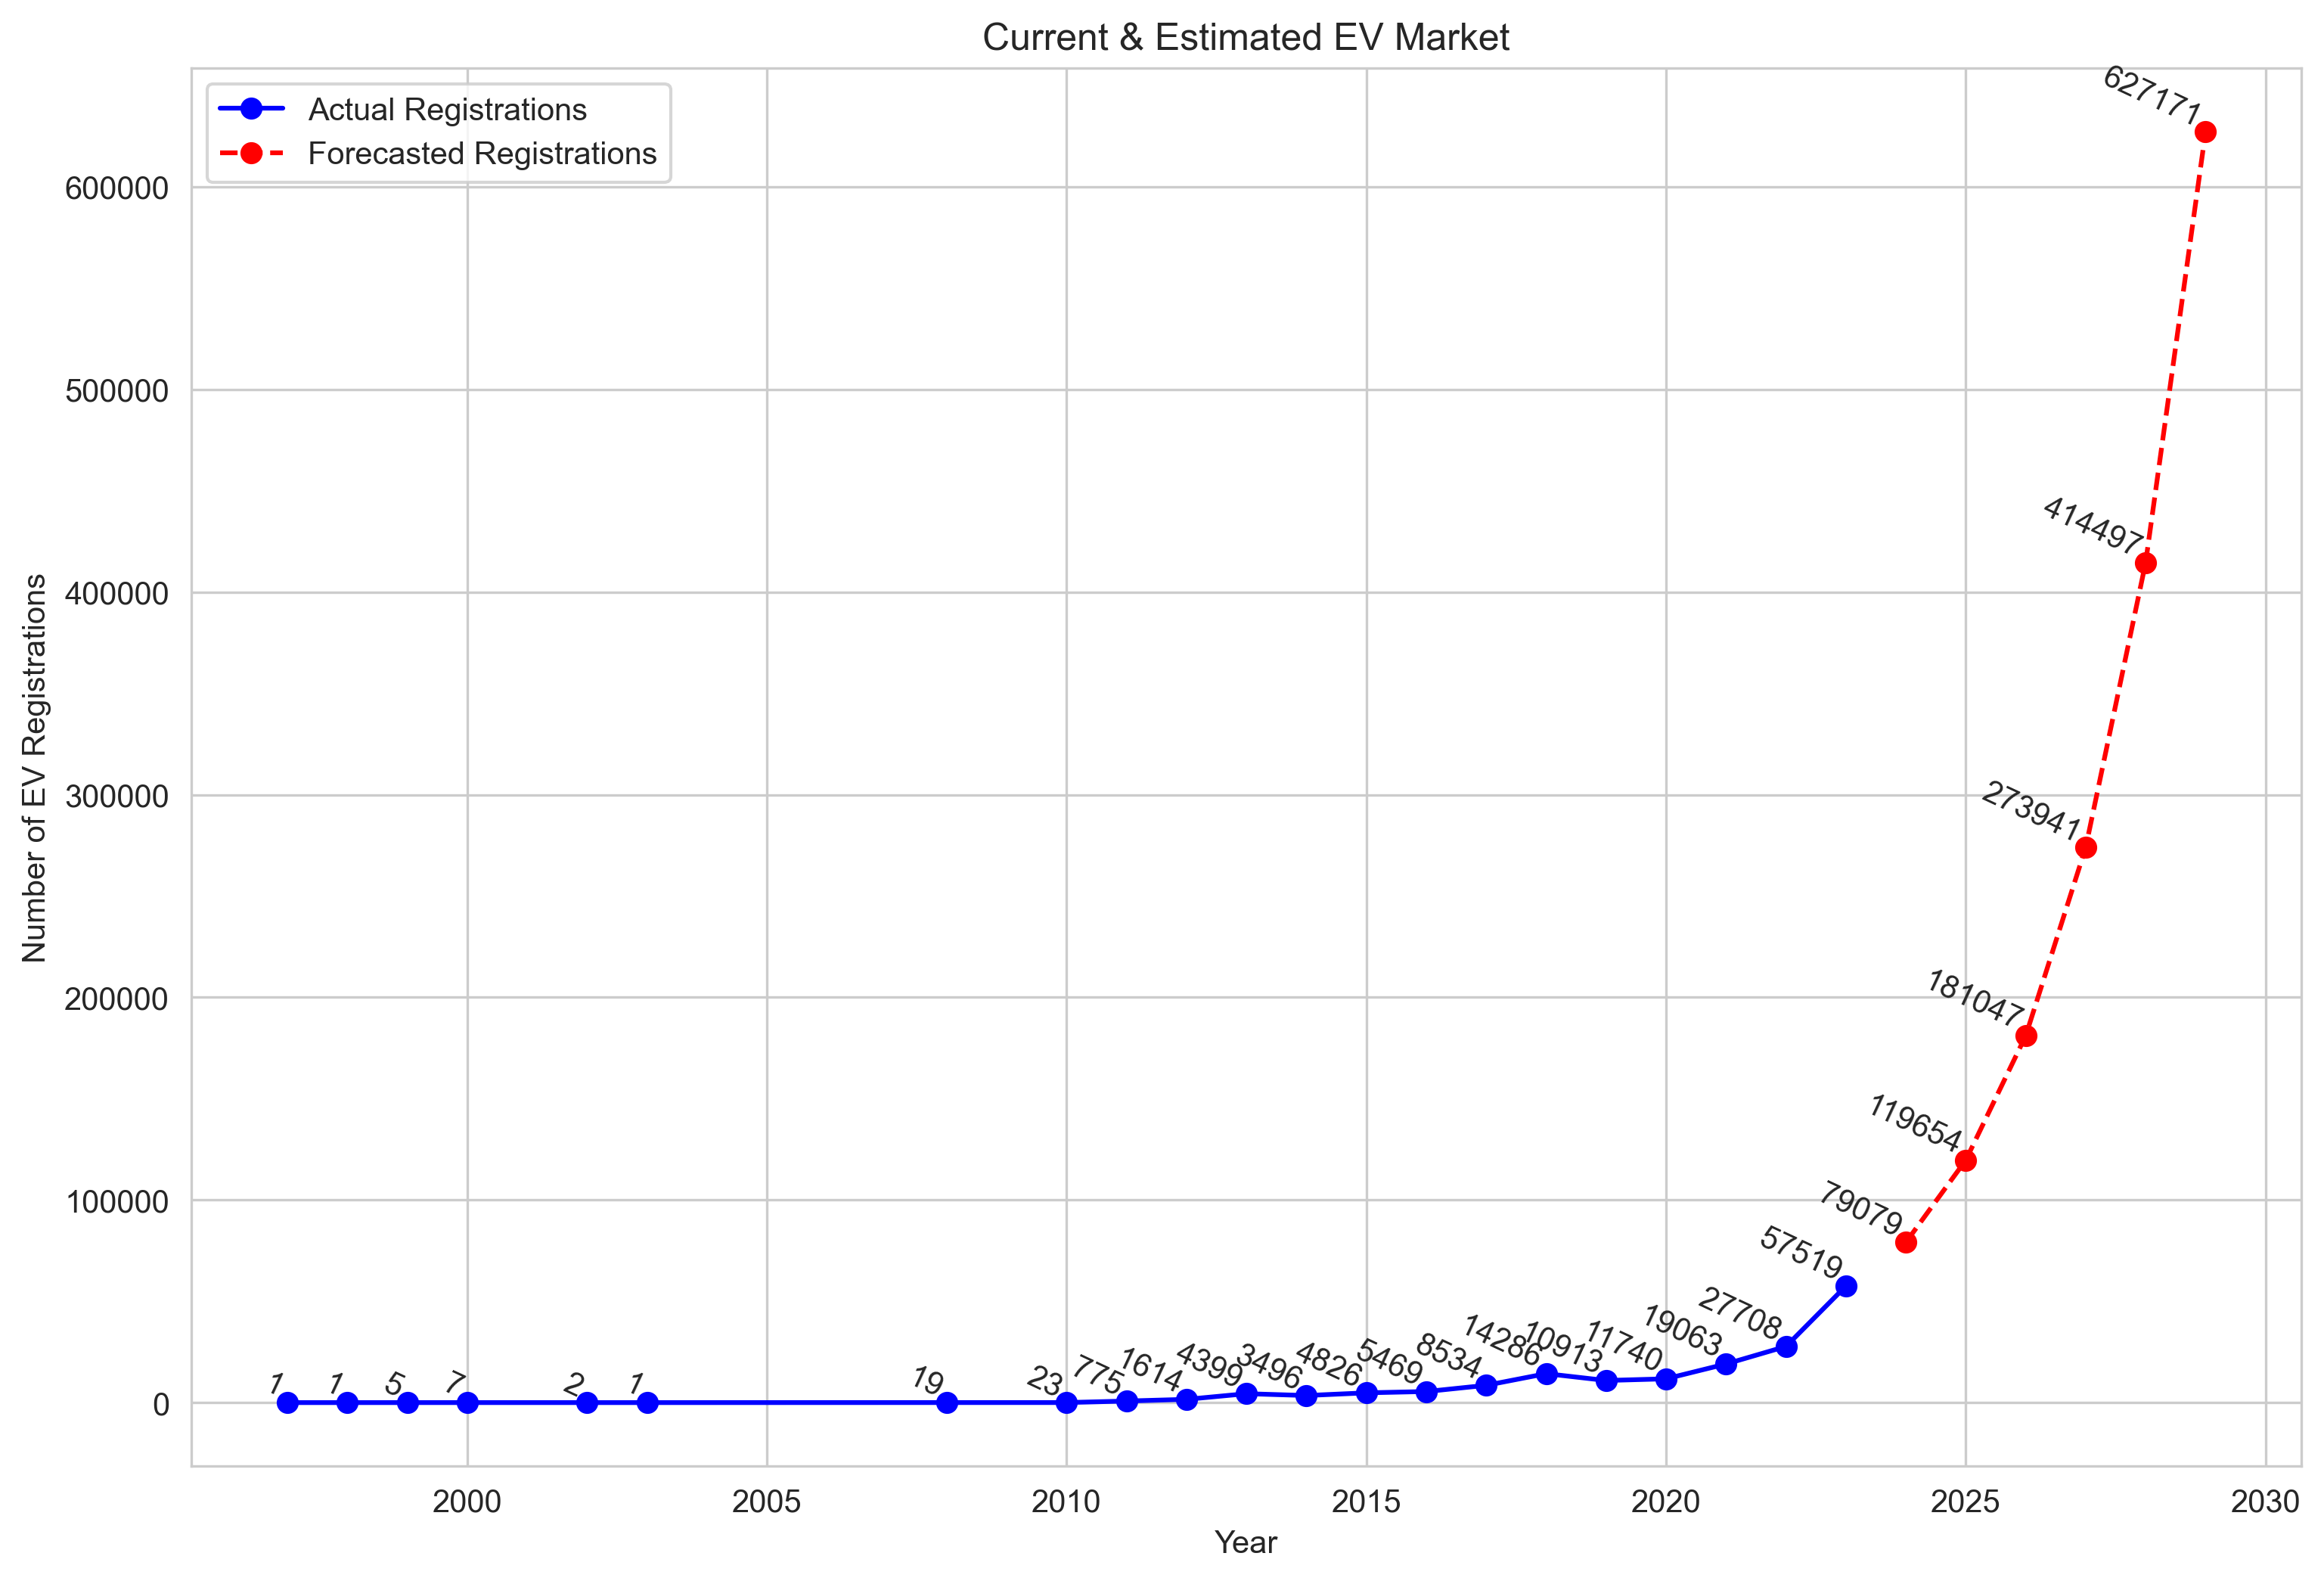

In [17]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8), dpi=300)
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

for x, y in zip(actual_years, actual_values):
    plt.text(x, y, f'{y:.0f}', ha='right', va='bottom', rotation=-25)

for x, y in zip(forecast_years_full, forecasted_values_full):
    plt.text(x, y, f'{y:.0f}', ha='right', va='bottom', rotation=-25)

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:#285238ff;">Observations and Conclusions from EV Registration Graph</span>

<span style="color:#138a36ff;">From the above graph, we can see:</span>

<ul style="color:#138a36ff;">
  <li><strong>Stable Early Period:</strong> The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.</li>
  
  <li><strong>Forecasted Growth:</strong> The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.</li>
  
  <li><strong>Expanding Market Size:</strong> Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably.</li>
  
  <li><strong>Increasing Consumer Adoption:</strong> The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue.</li>
  
  <li><strong>Promising Future for the EV Industry:</strong> Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.</li>
</ul>


# <span style="color:#285238ff;">Summary</span>

<span style="color:#138a36ff;">So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.</span>